In [1]:
import coremltools as ct
import PIL
import matplotlib.pyplot as plt
import numpy as np

scikit-learn version 1.2.2 is not supported. Minimum required version: 0.17. Maximum required version: 1.1.2. Disabling scikit-learn conversion API.


In [2]:
model_path = "../Wallpaper Previewer/Neural Networks/DeepLabV3Plus-mobileone_s3.mlpackage"

model = ct.models.MLModel(model_path)
spec = model.get_spec()

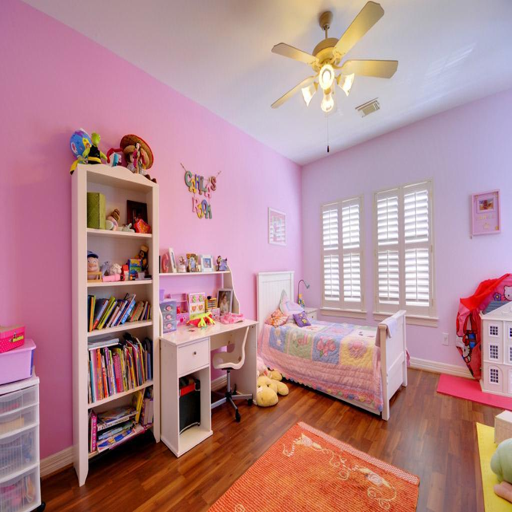

In [3]:
image_path = "../texture_synthesis_adapter/fixtures/rooms/2.png"

image = PIL.Image.open(image_path)
image

In [4]:
input_width = spec.description.input[0].type.imageType.width
input_height = spec.description.input[0].type.imageType.height
input_width, input_height

(800, 800)

In [5]:
input_name = spec.description.input[0].name
input_name

'input'

In [7]:
input_image = image.resize((input_width, input_height))
input_image.size

(800, 800)

In [8]:
preds = model.predict({input_name: input_image})
preds.keys()

dict_keys(['output'])

In [9]:
output = preds["output"]
output.shape

(800, 800)

(800, 800)


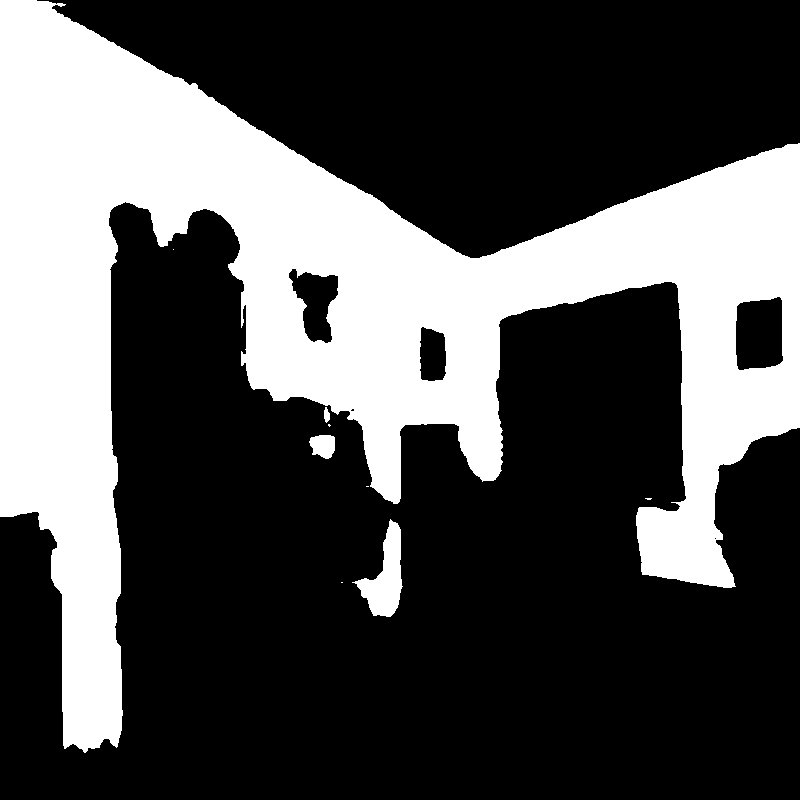

In [12]:
threshold = 0.5
mask = np.zeros_like(output, dtype=np.uint8)
mask[output>=threshold] = 255
mask[output<threshold] = 0

mask_image = PIL.Image.fromarray(mask)
print(mask_image.size)
mask_image

In [14]:
mask_image_file = "../texture_synthesis_adapter/fixtures/masks/2.jpg"
mask_image.save(mask_image_file)